# How does matplotlib work?
本文会提到下面几个核心的概念：
- `matplotlib`核心`API`观念与组成
- `matplotlib`的核心绘图观念
- 如何精细地控制`matplotlib`绘图元件

非常推荐先从核心的`API`与绘图观念开始看起，这样能够了解`matplotlib`的设计概念，也能够在未来使用`matplotlib`时，了解不同情况下的适用参数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 原文：https://medium.com/%E6%95%B8%E6%93%9A%E4%B8%8D%E6%AD%A2-not-only-data/%E6%B7%B1%E5%85%A5%E6%B7%BA%E5%87%BA-python-%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6-matplotlib-seaborn-%E6%A0%B8%E5%BF%83%E6%8C%87%E5%8D%97%E8%88%87%E7%B9%AA%E8%A3%BD-44a47458912

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  img {width:33%; height: 33%;}
</style>

## 一、Matplotlib API 概观

`plt.plot()`和`ax.plot()`到底有什么区别？为什么有时候要用`plt.show()`而有时候却不使用？  
其实在`matplotlib`的`API`（Application Programming Interface）共分成两种型态，一种是我们常见到的`plt.plot`或是`df.plot`的形式，另一种则是`ax.plot`的形式。  
- `plt.plot`：绘图的懒人包（包括`df.plot`），会帮你直接在最近使用的图表上绘图，没有的话就会自动新建一个。
- `ax.plot`：手动建立的`API`，提供更多的自定义参数与图表控制。

建议先从`ax.plot`的完整`API`来学习，弄懂背后的完整原理之后，再来使用简单的`df.plot`懒人包。

## 二、Matplotlib的核心绘图观念

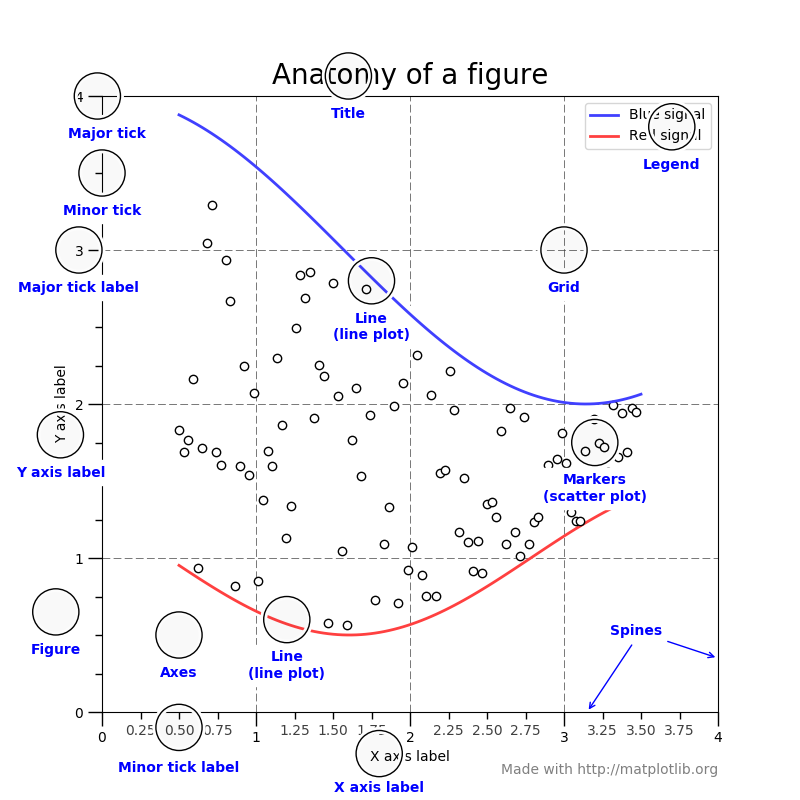

在绘图之前，先要弄清楚不同参数的含义。
- `Figure`：可以把它当作画布，一张画布上可以有很多的Axes。
- `Axes`：就是我们俗称的「子图」，每个Axes一次只能在一张画布上。

如果使用`plt.plot`来绘图，根本用不到`figure`和`axes`。  
`plt.plot`其实是一个黑盒子，它已经把基础的参数设置好，然后在最近一张子图中生成图表；如果没有则会创建一张子图，即自动创建了`figure`和`axes`。

### Add_subplot: 如何生成 “Figure” and “Axes”?

现在就创建1张画布figure并在画布上添加3个子图axes：

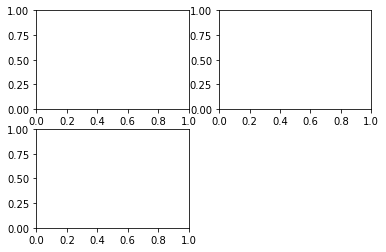

In [3]:
# 将figure实例化到fig的变量上，并设定宽与高（此处为预设值）
fig = plt.figure(figsize=(6,4))

# 将axes新增到实例化后2×2的figure上，并指定第1,2,3个
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)

<AxesSubplot:>

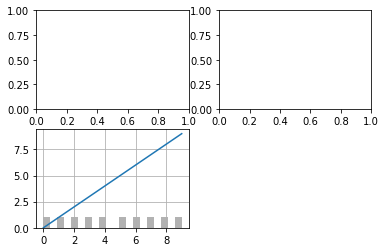

In [4]:
# 此时如果直接以plt.plot(df)等指令，会在距离最近的图中建立图。下面的例子就会是ax_3。
fig = plt.figure(figsize=(6,4))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)

s = pd.Series(np.arange(10))
s.plot()
s.hist(bins=20, color='k', alpha=0.3)

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

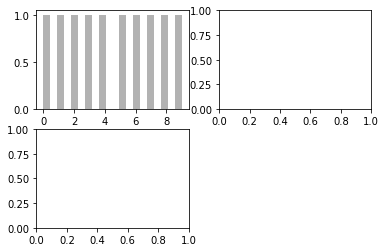

In [5]:
# 那如果要在ax_1上面画图该怎么做呢？只要用以下两种简单的方式，就可以绘在指定的图上了：
fig = plt.figure(figsize=(6,4))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)

# 下面两种方式是等价的，在第一个子图中绘制直方图，并设定为20个bins，颜色为黑色，透明度为0.3
# _ = ax_1.hist(np.arange(10), bins=20, color='k', alpha=0.3)
ax_1.hist(np.arange(10), bins=20, color='k', alpha=0.3)

### Sub_plots: 如何快速生成大量plots?

如果一次要创建好几个子图（`axes`），可以直接使用`plt.subplots()`一次性创建画布与子图，返回值是画布与子图（像二维阵列一样索引）的元祖。

(array([2., 2., 3., 0., 0., 1., 0., 1., 0., 1.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

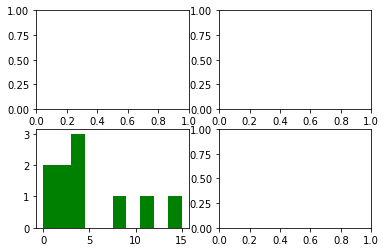

In [6]:
# 实例化subplots中的fig和axes，并生成2×2的排列方式
fig, axes = plt.subplots(2, 2)

# 指定第三个axes来绘图，并使用缩写的色码与线的形状，下面两行代码等价
axes[1, 0].hist(np.random.randint(0, 16, 10), bins=10, linestyle='--', color='g')
# axes[1, 0].hist(np.random.randint(0, 16, 10), bins=10, 'g--')

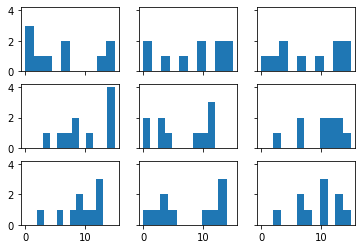

In [7]:
# 一次指定3×3的图来绘制，并共用x, y轴
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        axes[i, j].hist(np.random.randint(0, 16, 10))

# 调整子图间留白的宽和高的百分比，也可以在figure实例后使用subplots_adjust的方法来调整该图，下面两行代码等价
# plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.subplots_adjust(wspace=0.2, hspace=0.2)

下面是子图（subplots / add_subplot）的一些参数
 - nrows｜子图有几列，通常都会直接放上数字。
 - ncols｜子图有几栏，通常都会直接放上数字。
 - sharex｜所有子图是否共用一样的 x 轴，调整 xlim 会影响呈现范围。
 - sharey｜所有子图是否共用一样的 x 轴，调整 ylim 会影响呈现范围。

## 三、如何精细控制 Matplotlib 绘图元件

当我们已经可以轻松掌握`Figure`和`Axes`来进行绘制后，接下来可以更细致操作的便是每张图的细节了。下面会介绍几个常用的环节：
 - matplotlib细节设定
 - 如何控制各种绘图风格
 - 刻度、标识和图形
 - 注释与绘制箭头等形状
 - 储存图档

### 1. matplotlib细节设定

matplotlib本身在绘制时，就有许多的配置方案，可以用来控制各种细节甚至适用于出版的图片。如果想要直接控制这些设定，可以使用`rc`方法。
```python
# 对figure的figsize参数设定为10×10大小
plt.rc('figure', figsize=(10, 10))

# 若想要一次设置大量参数，可以使用dict来一次传入
font_options = {'family': 'Noto Serif',
                'weight': 'bold',
                'size': 'small'}
plt.rc('font', **font_options)

# 如果想要一劳永逸地改掉这些设定呢？一样可以到home目录下修改：
matplotlib/mpl-data/.matplotlibrc
```

### 2. 如何控制各种绘图风格

到这个阶段，真的要来绘制`plot`本身了！我们就先从最常见到的折线图开始说起。当我们绘制折线图时，其实本身点与点之间是以线性插值来连接，但如果我想要能够看到变化率呢？我们变可以更改`drawstyle`。  
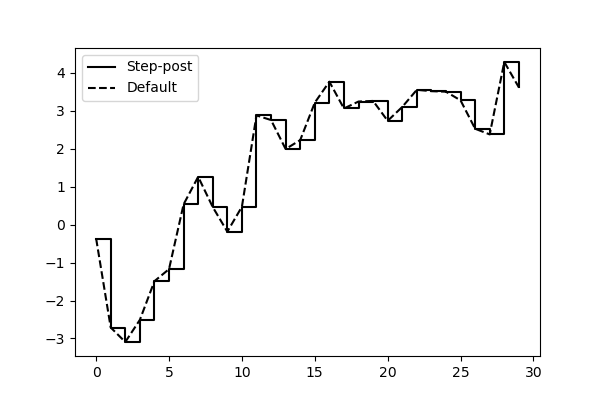

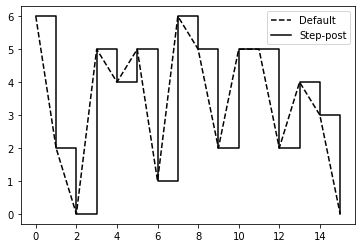

In [8]:
data = np.random.randint(0, 8, 16)

# 生成画布与子图
fig = plt.figure(figsize=(6,4))
axe = fig.add_subplot()

# 绘制不同drawstyle的图
axe.plot(data, 'k--', label='Default')
axe.plot(data, 'k-', drawstyle='steps-post', label='Step-post')

# 加上标识并汇出
axe.legend()
plt.show()

在设定参数时，多数的绘图方法都可以接受直接以`axe`作为参数，来更有弹性地绘制子图。下面列出了大部分常用的参数：
 - label｜图例用的标识，如上图的“Default”。
 - ax｜指定要拿来画图的axe，若没有指定则会由最靠近呼叫的axe画起
 - style｜用来传样式字串，例如`b-`等
 - alpha｜设定plot的透明度
 - kind｜可用`area`、`bar`、`barh`、`density`、`hist`、`kde`、`line`、`pie`
 - logy｜在y轴使用对数呈现，`logx`亦同
 - use_index｜以数据的`index`作为刻度标识，预设为`True`
 - rot｜选转刻度的标识，如`rot=30`，即为选转30度
 - xticks｜x轴刻度用的值，可以传入一个`list`来指定，`yticks`亦同
 - xlim｜x轴的范围，如[0, 100]；`ylim`亦同
 - grid｜显示轴的格线，预设为`False`

同样地，如果想要直接以DataFrame的黑盒子快速绘图，也可以参考以下的参数：
 - subplots｜如传入整个df，则可将每栏绘制到不同的子图中
 - sharex｜如为`True`时，所有的x轴、刻度、范围皆相同；`sharey`亦同
 - figsize｜以`figsize=(6,4)`指定`figure`大小
 - title｜字符串，指定标题
 - legend｜加入子图的图例，预设为`True`
 - sort_columns｜预设为使用既有的栏位排序，可调整排序

b. Other Plot Usage
 - Barplot｜以DataFrame作为输入时，会以一列中的多个值来作为图例标题使用；若在参数中加入`stacked=True`，则会形成叠加长条图。
 - density｜密度图（KDE），调用`plot.kde`时会使用混合常态估计法
 - Hist｜直方图，要指定`bins=50`的数量，常用数量为资料量的开根号

### 3. 刻度、标签和图形
大部分的绘图都会由`xlim`、`xticks`、`xticklabels`、`xlabels`四个方法组成绘图。其中分成以plt的介面和原生的matplotlib的API。个别的意义分别为：
- xlim｜x轴的范围，如[0,100]；`ylim`亦同。
- xticks｜x轴刻度用的值，可以传入一个`list`来指定，`yticks`亦同。
- xticklabels｜用于设定离散的x轴，可以传入一组`list`来设定。

#### Pyplot的设定方式：
会绘制在最后一个子图或目前使用的子图上。
- 不带参数调用｜会传回当前的参数之值，例如`plt.xlim()`会传回范围。
- 带著参数调用｜会设定新的值，如`plt.xlim([0, 100])`会设定新范围。

#### 原生 API 的设定方式：
会直接绘制在指定的子图上，主要分成`get_`和`set_`两种设定方法。
- axe.get_xlabel()｜便会传回当下x轴的轴名称。
- axe.set_xlabel()｜便会设定当下x轴的轴名称。

设定方法亦可以加入`rotation=30`和`fontsize='small'`等参数，如`set_xlabel(ratation=10)`，来进一步设定子图的刻度与标签。与上面的例子相同，我们也可以一次用`arg`的方式传入所有的参数。  
```
props = {'title': 'My plot',
         'xlabel': 'Types'}
axe.set(**props)
```

有了定制化的标签，就要加入图例读者才容易了解不同的线代表哪部分数据。加入的方法主要有两种：
```
axe.plot(label='label_1')
axe.legend(labels=['label_1', 'label_2'])
```
接着如果使用第一种，则要记得调用`plt.legend()`或`axe.legend()`。另外如果要设定图例的位置，可以简单地使用`loc='best'`，这样会自动找不会覆盖到图表的地方呈现，或者直接指定位置。

### 4. 注释与绘制箭头等形状
除了图例之外，有时也会需要绘制一些文字（text）、箭头（arrow）或注释（annotate）等，这时就可以使用下面三个方法：
- axe.text｜在子图的指定坐标加上文字
- axe.arrow｜在子图的指定坐标加上箭头
- axe.annotate｜注释可以直接划上文字和箭头。

#### a. `axe.text/axe.arrow`可以简单如以下方式呈现：
```python
# 在指定的 x,y 坐标处绘制上 'This is text' 的文字
axe.text(x,
         y,
         'This is text',
         family='serif',
         fontsize=12)
```

#### b. `axe.annotate`则可设定复杂的方法来呈现：
```python
# 生成子图
fig = plt.figure()
axe = fig.add_subplot(1, 1, 1)

# 读取数据
df = pd.read_csv('data/data.csv')

# 设定annotate的位置，以指定x的位置来标注
important_data = [(25, 'Point_1'),
                  (45, 'Point_2'),
                  (65, 'Point_3')]

# 将annotation标注上去
for point, label in important_data:
    axe.annotate(label,
                 xy=(point, df.asof(point) + 5),     # 指定text的位置
                 arrowprops=dict(facecolor='green',  # 指定箭头的形狀
                                 headwidth=4,
                                 width=2,
                                 headlength=4),
                 horizontalalignment='right', verticalalignment='top')  # 指定文字在箭头的何处

# 只看20~70的数据
axe.set_xlim([20, 70])
axe.set_title('How to set annotate')
```

### 5. 储存图档
当我们绘制好图表后，有时最后一阶段便需要输出图档，这时便可简单使用`savefig`来储存当前的`figure`。举例来说，如果想要把图存成`png`：  
```python
plt.savefig('savefig.png')
```

程序会根据你附上的文件名进行判别，自动生成该类型的图片。主要储存的方式一样分成两种，一种是`pyplot`，如`df.plot`的`API`；另一种则是`matplotlib`的原生`API`：
- plt.savefig｜会储存当前的`figure`。
- fig.savefig｜会储存`figure`实例化后`fig`画布上的图。

在输出图片时，有下列参数能够更细部地调整输出的图片，举例来说：
- fname｜档案名称与位置路径，以附档名为档案型态判断依据。
- dpi｜图片每英寸的解析度，预设为`100dpi`。
- facecolor｜子图外的背景颜色，预设为`'w'（白色）`。
- edgecolor｜子图外的边框颜色，预设为`'w'（白色）`。
- format｜明确指定要用的图片格式。
- bbox_inches｜指定图存档部分，若指定为`tight`则会将周围空白去掉

以上就是我们从建立`figure`画布、`axe`子图一路到输出图表的过程，相信读者也已经对于如何制作与调整一张图表，有了比较明确的概念。